<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> <em>Dia 6</em>:</span>


# Calculadora d'integrals

### Programa que compara una aproximació amb el valor real de la integral

<br>

<b> Descripció: </b>Aquest programa calcula la integral de dues maneres: un càlcul d'àrea rectangular i la funció<em> integrate </em>de la llibreria <em>Scipy</em>.

<b> Input: </b>Funció, límits d'integració i iteracions de l'aproximació. <br>
<b> Output: </b>Gràfic i error de l'aproximació en tan per cent.

<b> Problemes: </b>
<ol>

<li>La funcio d'entrada només permet canviar els coeficients {$c_{1}, c_{2}, c_{3}, c_{4}$} de la funció polinòmica:  
<br>
$$f(x) = c_{1}x^3 + c_{2}x^2 + c_{3}x + c_{4}$$</li>
<br>
<li> Cal implementar més funcions i millorar el mètode d'entrada de coeficients. </li>
<li> Actualització lenta del gràfic. </li>
<li> Eix $y$ o $f(x)$ del gràfic centrat nomes en $\mathbb{R} > 0$. Cal reprogramar per emmarcar tot $\mathbb{R}$.</li>
<li> <em>Widgets</em> situats massa verticalment, impedeixen visió completa del gràfic. Cal resituar-los intel·ligentment</li>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 5](Lector de webs.ipynb) </span>

<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> Anar a [Dia 7](Estudi d'un text.ipynb) </span>

<br>

In [1]:
from scipy import integrate
import numpy as np
import ipywidgets as wdg
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline

In [6]:
limInf = -2.5
limSup = 5
marge = 0.2
a = .5
b = -.5
c = -4.5
d = 8.
iteracions = 3

dlimInf = "Limit inferior"
dlimSup = "Limit superior"
da = "Coeficient x al cub"
db = "Coeficient x al quadrat"
dc = "Coeficient x"
dd= "Coeficient x a la zero"
diter = "Nombre de particions"

slimInf = wdg.FloatSlider(value = limInf, min = -5, max = 5, step = 0.05, description = dlimInf)
slimSup = wdg.FloatSlider(value = limSup, min = slimInf.value, max = 10, step = 0.05, description = dlimSup)
slimInf = wdg.FloatSlider(value = limInf, min = -5, max = slimSup.value, step = 0.05, description = dlimInf)

sa = wdg.FloatSlider(value = a, min = -10, max = 10, step = 0.5, description = da)
sb = wdg.FloatSlider(value = b, min = -10, max = 10, step = 0.5, description = db)
sc = wdg.FloatSlider(value = c, min = -10, max = 10, step = 0.5, description = dc)
sd = wdg.FloatSlider(value = d, min = -10, max = 10, step = 0.5, description = dd)

siter = wdg.IntSlider(value = iteracions, min = 1, max = 20, description = diter)

In [3]:
def funcioPol(x, a, b, c, d):
    return a*x**3+b*x**2+c*x+d

In [4]:
def fnc(limInf, limSup, a, b, c, d, iteracions):
    marge = 0.2
    Iref = integrate.quad(funcioPol, limInf, limSup, args=(a, b, c, d))[0]

    xmarg = np.arange(limInf-marge, limSup+marge, 0.001)
    ymarg = funcioPol(xmarg, a, b, c, d)
    x = np.arange(limInf, limSup, 0.001)
    y = funcioPol(x, a, b, c, d)

    plt.figure(figsize=(15,12))

    axes = plt.gca()

    P = []
    Iaprox = 0

    for i in range(iteracions):
        P.append(limInf+((limSup-limInf)/iteracions)*i)

    P.append(limSup)

    for i in range(iteracions):

        p1 = funcioPol(P[i], a, b, c, d)
        p2 = funcioPol(P[i+1], a, b, c, d)

        ar = ptc.FancyArrowPatch((P[i], p1), (P[i+1], p2), color = "orange", lw = 1.5)
        axes.add_patch(ar)
        ar = ptc.FancyArrowPatch((P[i], p1), (P[i],0), color = "orange", lw = 1.5)
        axes.add_patch(ar)

        base = (limSup-limInf)/iteracions

        area = (base*p1+base*p2)/2

        Iaprox = Iaprox + area

        if i == iteracions-1:
            ar = ptc.FancyArrowPatch((P[i+1], p2), (P[i+1],0), color = "orange", lw = 1.5)
            axes.add_patch(ar)


    
    plt.plot(xmarg, ymarg, color = "orange", lw=1.5, alpha = 1, label = "Area aproximada = {}".format(round(Iaprox, 3)))
    plt.plot(xmarg, ymarg, color = "#333333", lw=2, label = "Area exacta = {}".format(round(Iref, 3)))
    plt.plot(xmarg, ymarg, color = "green", lw=0, label = "Error relatiu = +{}%".format(round(100-(Iref/Iaprox)*100, 3)))
    plt.fill_between(x, y, 0, color = "#666666", alpha=0.3)


    plt.legend(loc="upper left")
    plt.show()

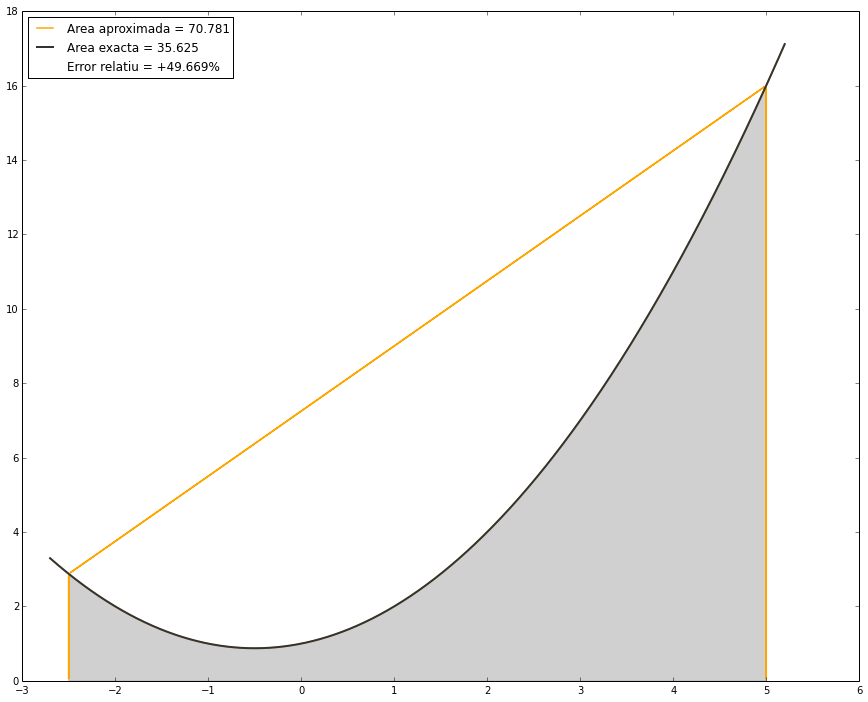

In [7]:
wdg.interactive(fnc, limInf = slimInf, limSup = slimSup, a = sa, b = sb, c = sc, d = sd, iteracions = siter)